Outliers can be detected using these methods:
    
    1. Percentile Technique
        1. Domain Knowledge: Setting the range threshold directly(if known)
        2. Quantile Method: Setting the percentage threshold
    2. Standard Deviation
    3. Z-score Removal

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv('bhp.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


__Data Exploration__

In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [5]:
1.200000*10**7 # max price_per_sqft- removing the e 

12000000.0

In [6]:
df[df.price_per_sqft==12000000] #only 1 row with this huge number

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000


__Plot to check the data distribution__

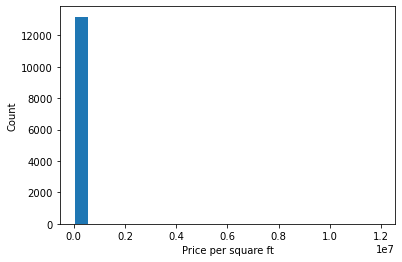

In [7]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

___Using Log scale for better understanding___

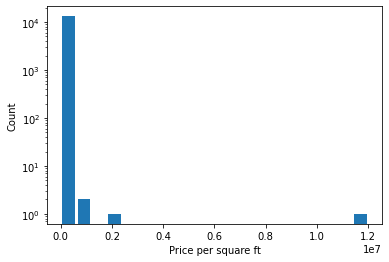

In [8]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

## Method1: Using Percentile technique (quantile method)__

In [9]:
min_threshold, max_threshold = df['price_per_sqft'].quantile([0.001,0.999]) # thresholds at 0.1 % and 99.90 %
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [10]:
df1 = df[(df['price_per_sqft']>min_threshold) & (df['price_per_sqft']<max_threshold)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [11]:
df.shape[0]- df1.shape[0] #total 28 outliers removed

28

___removed total 28 outliers___

## Method3:  Outlier Removal using Z-Score__
    
    We will use the cleaned dataset df1 using quantile methods to further remove the outliers
    Here we will use Z-Score
    Method3 : Zscore outlier removal gives the same results as method 2(Shown in another notebook).

In [12]:
df1.price_per_sqft.describe() #observe the min and max values

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [13]:
mean= df1.price_per_sqft.mean()
mean

6663.6537351958705

In [14]:
std = df1.price_per_sqft.std()
std

4141.020700174605

In [15]:
df1['z_score'] = (df1.price_per_sqft - mean)/std
df1

C:\Users\DELL\AppData\Local\Temp\ipykernel_6212\4256074883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['z_score'] = (df1.price_per_sqft - mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


___Creating new dataset using Z-score___

In [17]:
df2 = df1[(df1['z_score']>-4) &(df1['z_score']<4)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [18]:
df1.shape

(13172, 8)

In [19]:
df1.shape[0]- df2.shape[0]

125

___removed total 125 outliers___

__We conculded that the results we get after using Z-Score Method is the exact same as that of the standard Deviation__

    Condition: Same value of std dev and zscore should be considered. In this case 4.
    Everything Here onwards is same as std deviation Method2 notebook

In [20]:
df2.price_per_sqft.describe() #reference for below plots

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

___Bar Chart___

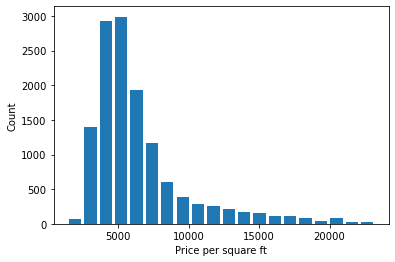

In [21]:
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

___Bar Chart with curve plot___

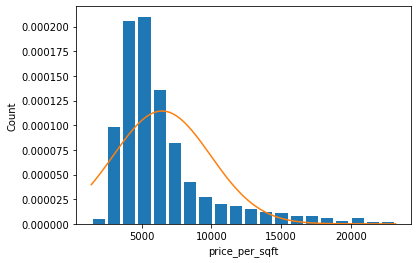

In [22]:
from scipy.stats import norm

# these lines are for ploting a histogram. (Density= True) plots the bell curve on histogram , else seperately plotted.
plt.hist(df2.price_per_sqft,bins =20,rwidth= 0.8,density = True) 
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(df2.price_per_sqft.min(),df2.price_per_sqft.max(),0.1) # (min,max,step)
plt.plot(rng,norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

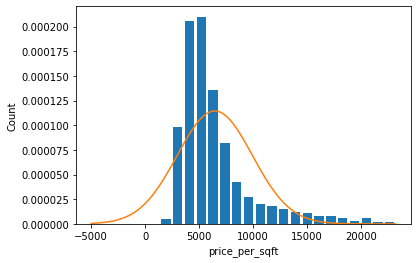

In [23]:
from scipy.stats import norm

# these lines are for ploting a histogram. (Density= True) plots the bell curve on histogram , else seperately plotted.
plt.hist(df2.price_per_sqft,bins =20,rwidth= 0.8,density = True) 
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(-5000,df2.price_per_sqft.max(),0.1) # (min,max,step)
plt.plot(rng,norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

___Bar Chart and plot using seaborn___

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

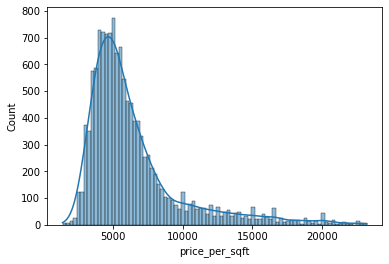

In [24]:
sn.histplot(df2.price_per_sqft,kde=True) #hist with kde= True (plots the curve)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

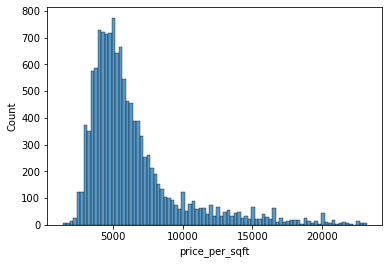

In [25]:
sn.histplot(df2.price_per_sqft) #hist without kde= True(does not plot the curve)

__We conculded that the results we get after using Z-Score Method is the exact same as that of the standard Deviation__

Condition: Same value of std dev and zscore should be considered. In this case 4.